# Import Statements, Function Definitions, and Loading in Data

In [32]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pybedtools
import statistics as stats
from pybedtools import BedTool
from scipy.stats import mannwhitneyu
from scipy.stats import anderson_ksamp
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})

#Loading in data as a pandas data frame, called result
result = pd.read_csv("chr1_enhancer_prob.csv", names = ["prob", "sequence", "seq id", "partial length", "whole length"])


In [3]:
#binary search used later on in the code is defined up here-- pretty straightforward algorithm, only difference is that I'm not looking for
#an exact value, but a value that falls in a "window" between two other values
def binary_search(array, low, high, toFind, window):
    if high >= low: 
        mid = (high + low) // 2
        # If element is present at the middle itself 
        if (array[mid] < toFind + window and array[mid] > toFind - window):
            return mid 

        elif array[mid] > toFind: 
            return binary_search(array, low, mid - 1, toFind, window) 
   
        else: 
            return binary_search(array, mid + 1, high, toFind, window) 
  
    else: 
        # Element is not present in the array 
        return -1

# Univariate Plots

54634


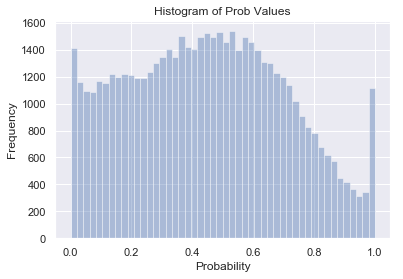

In [4]:
### PLOTS
##plotting a histogram of prob values
prob_val = pd.to_numeric(result['prob'])
print(len(prob_val))
sns.distplot(prob_val, kde=False)
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.title("Histogram of Prob Values")
plt.show()


3229
          start  index
0     100486466      0
1     100504411      4
2      10057921     13
3     100616633     29
4     100697603     34
5     100878180     40
6      10188116     62
7     101902270     77
8     101961772     82
9      10254171     85
10     10255160    105
11     10257117    122
12     10261336    140
13     10262162    164
14     10314840    180
15    103664230    200
16    103781141    211
17     10401443    226
18    104769364    239
19    104827692    262
20    104828250    288
21    104944551    293
22    104987848    311
23    105089334    317
24    105093200    320
25    105123989    328
26    105171179    346
27    105317758    362
28    105420162    381
29    105491404    401
...         ...    ...
3200   95664187  54150
3201   95665445  54183
3202   95665894  54189
3203   95666297  54211
3204   95668243  54225
3205    9574374  54239
3206    9613909  54248
3207    9631613  54268
3208   96874739  54283
3209   96876167  54293
3210    9701988  54311
3211  

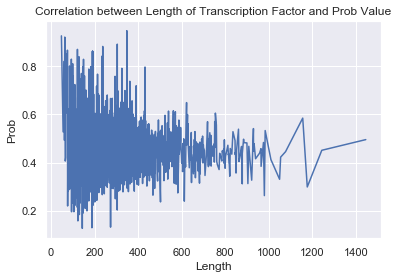

In [25]:
##plotting correlation between length and prob
start = []
end = []
index = 0
length = pd.to_numeric(result["whole length"])
for seqId in result['seq id']:
    seq_start = (seqId.split('chr1:'))[1].split('-')[0]
    seq_end = seqId.split('-', 1)[1]
    #if you haven't ever seen the start or end
    if int(seq_start) not in (pd.DataFrame(start)).values: #returns true if the element is present
        start.append([int(seq_start), index])
    if int(seq_end) not in (pd.DataFrame(end)).values:
        end.append([int(seq_end), index])
    index = index + 1


ind = (pd.DataFrame(start)).iloc[:, 1]
print(len(ind)-1)
start = pd.DataFrame(start)
start.columns= ['start', 'index']
end = pd.DataFrame(end)
end.columns = ['end', 'index']

print(start)
avg_val = 0
avg_prob = []
prob_chr = []
for i in range(0, len(ind)-1, 1):
    prob_chr = prob_val[ind[i]:ind[i+1]]
    if (len(prob_chr)==0):
        avg = prob_chr
    else:
        for i in range (0, len(prob_chr), 1):
            avg_val = avg_val + (pd.DataFrame(prob_chr)).iloc[i].iat[0]

        avg_val = avg_val / (len(prob_chr)+1)
        avg_prob.append(avg_val)
        
avg_len = 0
avg_total_length = []
len_chr=[]
for i in range (0, len(ind)-1, 1):
    len_chr = length[ind[i]:ind[i+1]]
    for i in range(0, len(len_chr), 1):
        avg_len = avg_len + (pd.DataFrame(len_chr)).iloc[i].iat[0]
    
    avg_len = avg_len / (len(len_chr)+1)
    avg_total_length.append(avg_len)
        
        
sns.lineplot(avg_total_length, avg_prob)
plt.xlabel("Length")
plt.ylabel("Prob")
plt.title("Correlation between Length of Transcription Factor and Prob Value")
plt.show()


388.2084599333748


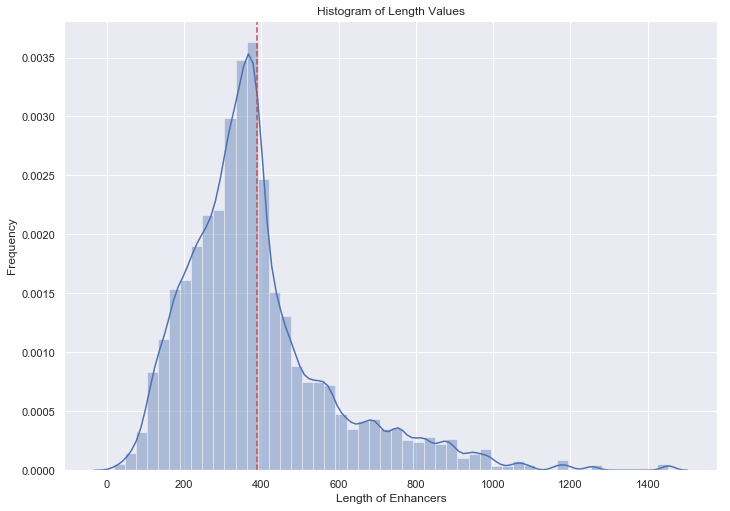

In [76]:
sns.distplot(length)
mean = stats.mean(length)
print(mean)
plt.axvline(mean, color='r', linestyle='--')
plt.xlabel("Length of Enhancers")
plt.ylabel("Frequency")
plt.title("Histogram of Length Values")
plt.show()   


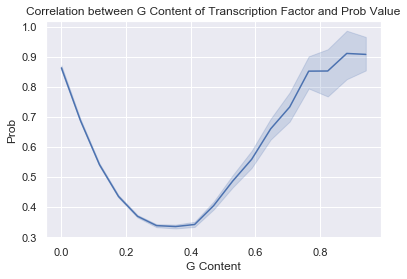

Text(0.5, 1.0, 'Correlation between G Content of Transcription Factor and Prob Value (Averaged)')

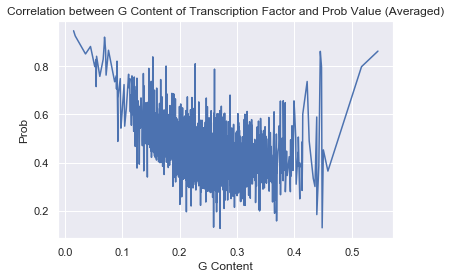

In [6]:
##plotting prob and G content
G_content = []

sequence = result['sequence']
for seq in sequence:
    G_content_count = 0
    for i in range(0, len(seq), 1):
        seq_part = seq[i : i+1]
        if (seq_part == "G"):
            G_content_count = G_content_count + 1
        else:
            G_content_count = G_content_count + 0

    G_content.append(G_content_count/len(seq))
sns.lineplot(G_content, prob_val)
plt.xlabel("G Content")
plt.ylabel("Prob")
plt.title("Correlation between G Content of Transcription Factor and Prob Value")
plt.show()

#plotting average G content across each enhancer
avg_G = 0
avg_total_G = []
G_chr=[]
for i in range (0, len(ind)-1, 1):
    G_chr = G_content[ind[i]:ind[i+1]]
    for i in range(0, len(G_chr), 1):
        avg_G = avg_G + (pd.DataFrame(G_chr)).iloc[i].iat[0]
    
    avg_G = avg_G / (len(G_chr)+1)
    avg_total_G.append(avg_G)
        
sns.lineplot(avg_total_G, avg_prob)
plt.xlabel("G Content")
plt.ylabel("Prob")
plt.title("Correlation between G Content of Transcription Factor and Prob Value (Averaged)")#plt.show()

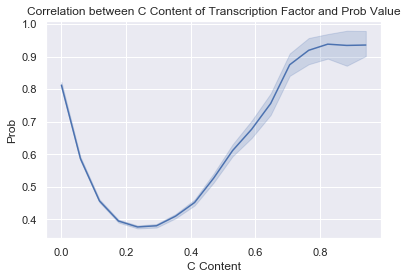

Text(0.5, 1.0, 'Correlation between C Content of Transcription Factor and Prob Value (Averaged)')

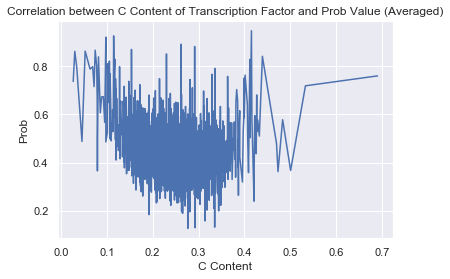

In [7]:
##plotting prob and C content
C_content = []

sequence = result['sequence']
for seq in sequence:
    C_content_count = 0
    for i in range(0, len(seq), 1):
        seq_part = seq[i : i+1]
        if (seq_part == "C"):
            C_content_count = C_content_count + 1
        else:
            C_content_count = C_content_count + 0

    C_content.append(C_content_count/len(seq))
sns.lineplot(C_content, prob_val)
plt.xlabel("C Content")
plt.ylabel("Prob")
plt.title("Correlation between C Content of Transcription Factor and Prob Value")
plt.show()



#plotting average C content across each enhancer
avg_C = 0
avg_total_C = []
C_chr=[]
for i in range (0, len(ind)-1, 1):
    C_chr = C_content[ind[i]:ind[i+1]]
    for i in range(0, len(C_chr), 1):
        avg_C = avg_C + (pd.DataFrame(C_chr)).iloc[i].iat[0]
    
    avg_C = avg_C / (len(C_chr)+1)
    avg_total_C.append(avg_C)
        
sns.lineplot(avg_total_C, avg_prob)
plt.xlabel("C Content")
plt.ylabel("Prob")
plt.title("Correlation between C Content of Transcription Factor and Prob Value (Averaged)")#plt.show()

Text(0.5, 1.0, 'Correlation between GC Content of Transcription Factor and Prob Value (Averaged)')

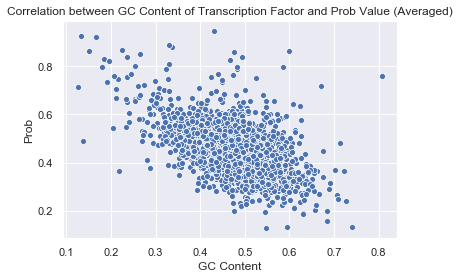

In [8]:
#GC Content (used later)
avg_total_GC = np.add(avg_total_G, avg_total_C)
sns.scatterplot(avg_total_GC, avg_prob)
plt.xlabel("GC Content")
plt.ylabel("Prob")
plt.title("Correlation between GC Content of Transcription Factor and Prob Value (Averaged)")#plt.show

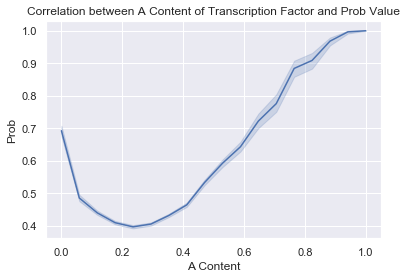

Text(0.5, 1.0, 'Correlation between A Content of Transcription Factor and Prob Value (Averaged)')

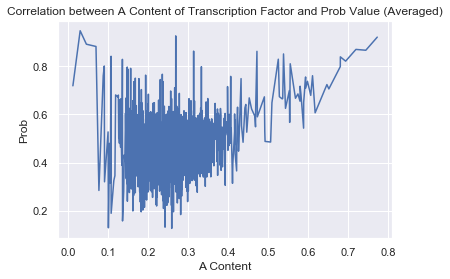

In [9]:
##plotting prob and A content
A_content = []

sequence = result['sequence']
for seq in sequence:
    A_content_count = 0
    for i in range(0, len(seq), 1):
        seq_part = seq[i : i+1]
        if (seq_part == "A"):
            A_content_count = A_content_count + 1
        else:
            A_content_count = A_content_count + 0

    A_content.append(A_content_count/len(seq))
sns.lineplot(A_content, prob_val)
plt.xlabel("A Content")
plt.ylabel("Prob")
plt.title("Correlation between A Content of Transcription Factor and Prob Value")
plt.show()

#plotting average A content across each enhancer
avg_A = 0
avg_total_A = []
A_chr=[]
for i in range (0, len(ind)-1, 1):
    A_chr = A_content[ind[i]:ind[i+1]]
    for i in range(0, len(A_chr), 1):
        avg_A = avg_A + (pd.DataFrame(A_chr)).iloc[i].iat[0]
    
    avg_A = avg_A / (len(A_chr)+1)
    avg_total_A.append(avg_A)
        
sns.lineplot(avg_total_A, avg_prob)
plt.xlabel("A Content")
plt.ylabel("Prob")
plt.title("Correlation between A Content of Transcription Factor and Prob Value (Averaged)")#plt.show()

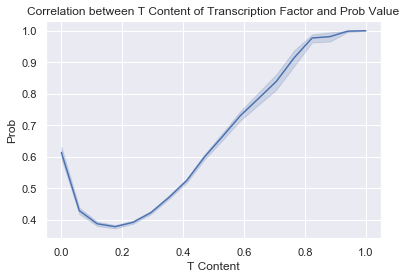

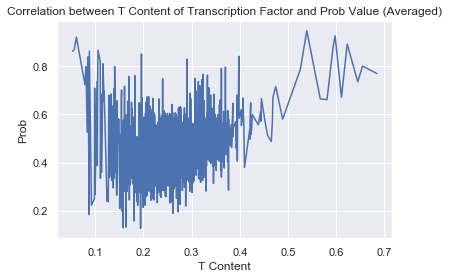

In [10]:
##plotting prob and T content
T_content = []

sequence = result['sequence']
for seq in sequence:
    T_content_count = 0
    for i in range(0, len(seq), 1):
        seq_part = seq[i : i+1]
        if (seq_part == "T"):
            T_content_count = T_content_count + 1
        else:
            T_content_count = T_content_count + 0

    T_content.append(T_content_count/len(seq))
sns.lineplot(T_content, prob_val)
plt.xlabel("T Content")
plt.ylabel("Prob")
plt.title("Correlation between T Content of Transcription Factor and Prob Value")
plt.show()

#plotting average T content across each enhancer-- 
avg_T = 0
avg_total_T = []
T_chr=[]
for i in range (0, len(ind)-1, 1):
    T_chr = T_content[ind[i]:ind[i+1]]
    for i in range(0, len(T_chr), 1):
        avg_T = avg_T + (pd.DataFrame(T_chr)).iloc[i].iat[0]
    
    avg_T = avg_T / (len(T_chr)+1)
    avg_total_T.append(avg_T)
        
sns.lineplot(avg_total_T, avg_prob)
plt.xlabel("T Content")
plt.ylabel("Prob")
plt.title("Correlation between T Content of Transcription Factor and Prob Value (Averaged)")
plt.show()

In [ ]:
px.scatter(df, x = "GC content",  y = "C content", trendline = "ols")

In [ ]:
px.scatter(df, x = "GC content",  y = "A content", trendline = "ols")

In [ ]:
px.scatter(df, x = "GC content",  y = "T content", trendline = "ols")

In [56]:
##plotting correlation between kas peaks and prob   -- without intersect     
#kasPeak = []
#bedFile = pd.read_csv('mESC_KAS-IP.rep1.bed', sep='\t', comment='t', names=['chrom', 'chromStart', 'chromEnd', 'val1', 'val2', 'val3'])
#print(bedFile.head())
#want only chr1 from the bedFile
#chr1Bed = bedFile.loc[bedFile['chrom'] == "chr1"]
#print(len(chr1Bed))

##RUN 1: GOING THROUGH FOR NESTED LOOPS ONE WAY
#for valStart in pd.to_numeric(chr1Bed['chromStart']):
#    for seqId in result['seq id']:
#        seq_start = (seqId.split('chr1:'))[1].split('-')[0]
#        seq_end = seqId.split('-', 1)[1]
#        print(valStart)
#        print(seq_start)
#        if (int(seq_start) == valStart):
#            for valStop in pd.to_numeric(chr1Bed['chromEnd']):
#                print(valStop)
#                print(seq_end)
#                if (int(seq_end) == valStop):
#                    kasPeak.append(1)
#                    print("saving 1")
#                else:
#                    kasPeak.append(0)
#        else:
#            kasPeak.append(0)
#            print("none")

##RUN 2: GOING THOUGH NESTED FOR LOOPS THE OTHER WAY
#for seqId in result['seq id']:
#    seq_start = (seqId.split('chr1:'))[1].split('-')[0]
#    seq_end = seqId.split('-', 1)[1]
#    for valStart in pd.to_numeric(chr1Bed['chromStart']):
#        print(valStart)
#        print(seq_start)
#        if (int(seq_start) == valStart):
#            for valStop in pd.to_numeric(chr1Bed['chromEnd']):
#                print(valStop)
#                print(seq_end)
#                if (int(seq_end) == valStop):
#                    kasPeak.append(1)
#                    print("saving 1")
#                else:
#                    kasPeak.append(0)
#                    print("saving 0")
#        else:
#            kasPeak.append(0)
#            print("none")

##RUN 3: BINARY SEARCH
#
# start = []
# end = []
# index = 0
# ##start.append([0,0])
# ##end.append([0,0])
# ##getting avg prob value
# for seqId in result['seq id']:
#     seq_start = (seqId.split('chr1:'))[1].split('-')[0]
#     seq_end = seqId.split('-', 1)[1]
#     #if you haven't ever seen the start or end
#     if int(seq_start) not in (pd.DataFrame(start)).values: #returns true if the element is present
#         start.append([int(seq_start), index])
#        #print((pd.DataFrame(start)))
#         if int(seq_end) not in end:
#             end.append([int(seq_end), index])
#     index = index + 1

# ind = (pd.DataFrame(start)).iloc[:, 1]
# print(len(ind)-1)
# avg_val = 0
# avg_prob = []
# prob_chr = []
# for i in range(0, len(ind)-1, 1):
#     prob_chr = prob_val[ind[i]:ind[i+1]]
#     if (len(prob_chr)==0):
#         avg = prob_chr
#     else:
#         for i in range (0, len(prob_chr), 1):
#             avg_val = avg_val + (pd.DataFrame(prob_chr)).iloc[i].iat[0]

#         avg_val = avg_val / (len(prob_chr)+1)
#         avg_prob.append(avg_val)
        

# start = []
# end = []
# for seqId in result['seq id']:
#     seq_start = (seqId.split('chr1:'))[1].split('-')[0]
#     seq_end = seqId.split('-', 1)[1]
#     #if you haven't ever seen the start or end
#     if seq_start not in start:
#         start.append(seq_start)
#         if seq_end not in end:
#             end.append(seq_end)
            
#             start_result = binary_search(pd.to_numeric(pd.to_numeric(chr1Bed['chromStart'])), 0, len(pd.to_numeric(chr1Bed['chromStart']))-1, int(seq_start), 30000)
#             stop_result = binary_search(pd.to_numeric(pd.to_numeric(chr1Bed['chromEnd'])), 0, len(pd.to_numeric(chr1Bed['chromEnd']))-1, int(seq_end), 30000)
#             if (start_result != -1 and stop_result != 1):
#                 kasPeak.append(1)
                
#             else:
#                 kasPeak.append(0)
                
# val = len(kasPeak) - 1

# kasPeak_plot = ((pd.DataFrame(kasPeak)).iloc[0:val, :]).values.tolist()

# kasPeak_heatmap = ((pd.DataFrame(kasPeak)).iloc[0:val, :])
# plt.scatter(kasPeak_plot, avg_prob)
# plt.xlabel("KAS Peaks")
# plt.ylabel("Prob")
# plt.title("Correlation between KAS Peaks of Transcription Factor and Prob Value")
# plt.show()
# ###plt.savefig('Kas_Prob.png')


/Users/Jumana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning:

read_table is deprecated, use read_csv instead, passing sep='\t'.



226
226
226
3229
3230
3229
0.4167203422231384


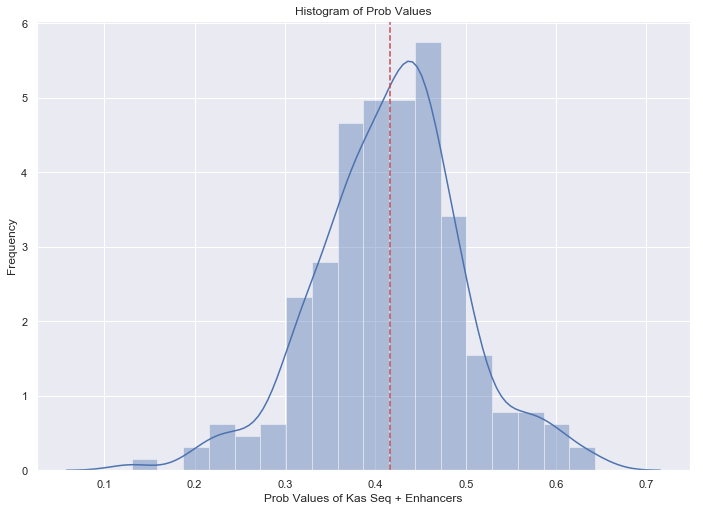

In [101]:
#using intersect
kasPeak=[]
p_val_kas = []
avg_total_prob=[]
len_val_kas = []
gc_val_kas = []
avg_pr=0

kas_file = pybedtools.BedTool('mESC_KAS-IP.rep1.bed')
prob_file = pybedtools.BedTool('chr1_enhancer_prob.bed')
kas_with_prob = kas_file.intersect(prob_file)
i=0 

df = pd.read_table(kas_with_prob.fn, names=['chrom', 'start', 'stop', 'name', 'score', 'strand'])
start_kas = pd.to_numeric(df['start'])
for val in start['start']:
    if (val in start_kas.values):
        #get the location at which the value is 
        location = start[start['start'] == val].index.values
        #print(location[0])
        #get the value of avg prob at the index
        val = avg_prob[location[0]]
        len_val = length[location[0]]
        gc_val = avg_total_GC[location[0]]
        #store vals in a pd
        p_val_kas.append(val)
        len_val_kas.append(len_val)
        gc_val_kas.append(gc_val)
        kasPeak.append(1)
    else:
        kasPeak.append(0)

val = len(kasPeak) - 1
kasPeak_plot = ((pd.DataFrame(kasPeak)).iloc[0:val, :]).values.tolist() 
kasPeak_heatmap = ((pd.DataFrame(kasPeak)).iloc[0:val, :])
print(len(p_val_kas))
print(len(len_val_kas))
print(len(gc_val_kas))
print(len(avg_prob))
print(len(start))
print(len(kasPeak_plot))
sns.distplot(p_val_kas)
mean = stats.mean(p_val_kas)
print(mean)
plt.axvline(mean, color='r', linestyle='--')
plt.xlabel("Prob Values of Kas Seq + Enhancers")
plt.ylabel("Frequency")
plt.title("Histogram of Prob Values")
plt.show()   



367


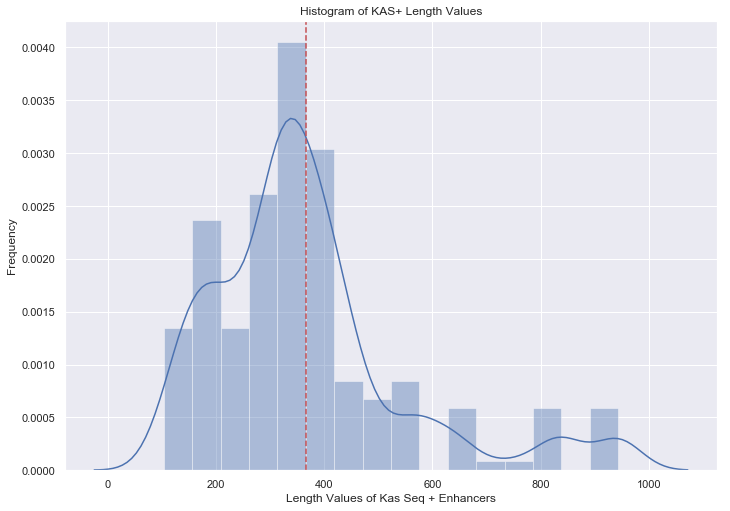

In [77]:
sns.distplot(len_val_kas)
mean = stats.mean(len_val_kas)
print(mean)
plt.axvline(mean, color='r', linestyle='--')
plt.xlabel("Length Values of Kas Seq + Enhancers")
plt.ylabel("Frequency")
plt.title("Histogram of KAS+ Length Values")
plt.show()   


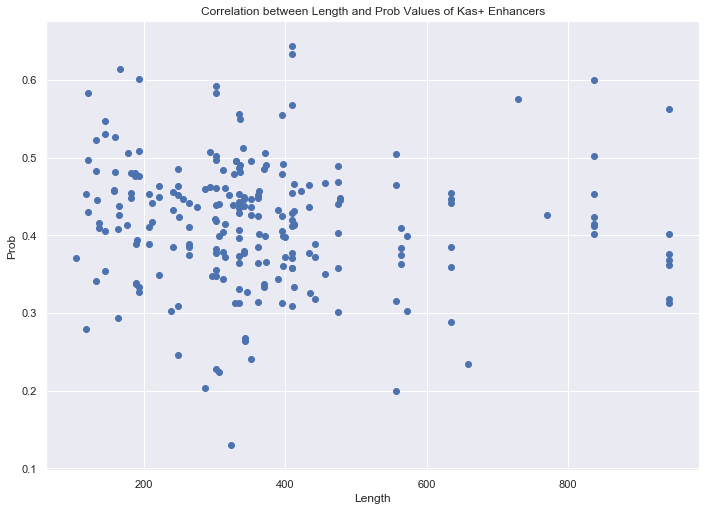

In [50]:
plt.scatter(len_val_kas, p_val_kas)
plt.xlabel("Length")
plt.ylabel("Prob")
plt.title("Correlation between Length and Prob Values of Kas+ Enhancers")
plt.show()

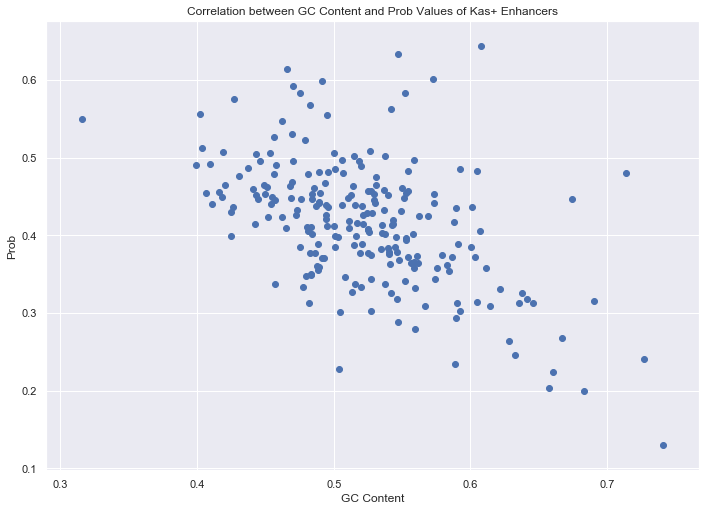

In [56]:
plt.scatter(gc_val_kas, p_val_kas)
plt.xlabel("GC Content")
plt.ylabel("Prob")
plt.title("Correlation between GC Content and Prob Values of Kas+ Enhancers")
plt.show()

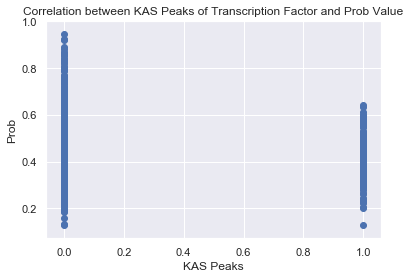

In [12]:
plt.scatter(kasPeak_plot, avg_prob)
plt.xlabel("KAS Peaks")
plt.ylabel("Prob")
plt.title("Correlation between KAS Peaks of Transcription Factor and Prob Value")
plt.show()

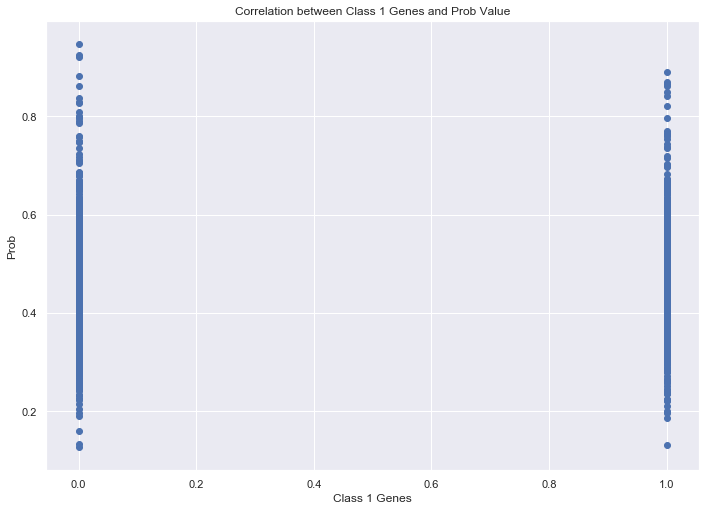

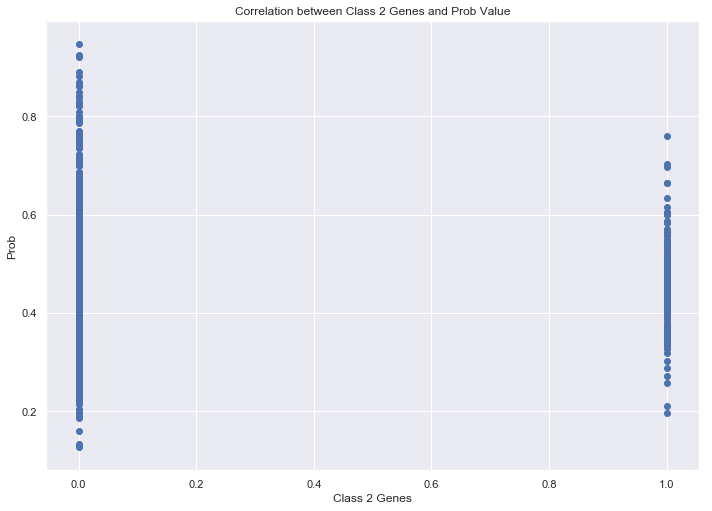

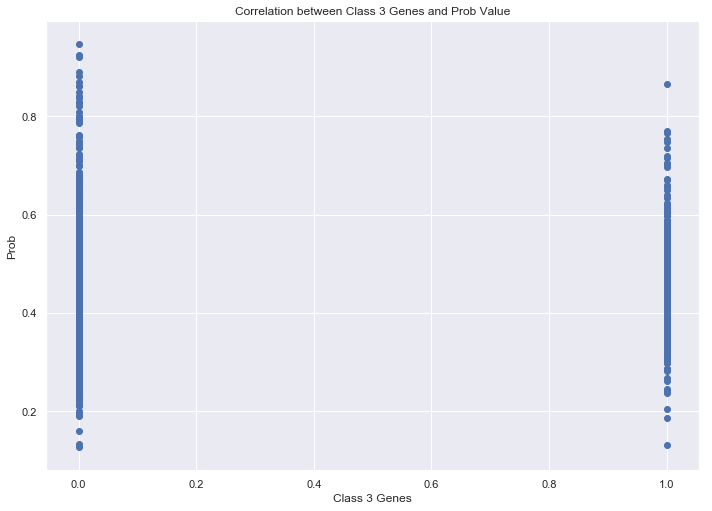

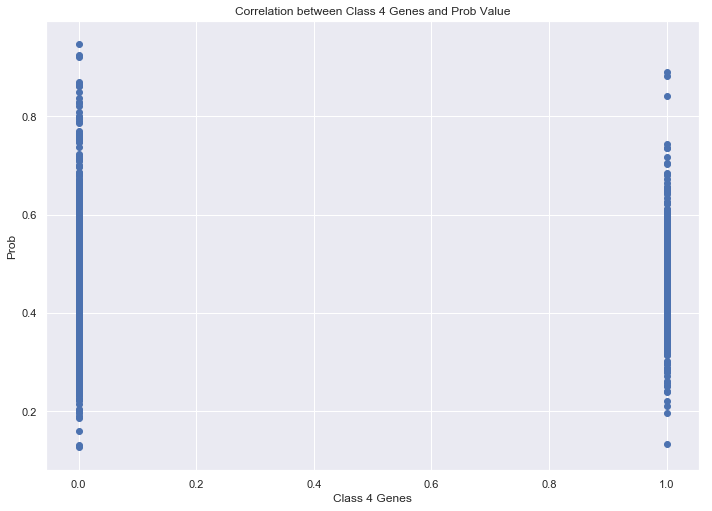

In [59]:
##plotting correlation between classes of genes from nature paper and prob values: WITHOUT INTERSECT

###class 1
class1 = pd.read_csv('class_1_genes.csv', names=['chr', 'st', 'end', 'symbol', 'strand'])
chr1_class1 = class1.loc[class1['chr'] == "chr1"]
class1Prob = []
start = []
end = []
for seqId in result['seq id']:
    seq_start = (seqId.split('chr1:'))[1].split('-')[0]
    seq_end = seqId.split('-', 1)[1]
    #if you haven't ever seen the start or end
    if seq_start not in start:
        start.append(seq_start)
        if seq_end not in end:
            end.append(seq_end)
            start_result = binary_search(pd.to_numeric(pd.to_numeric(chr1_class1['st'])), 0, len(pd.to_numeric(chr1_class1['st']))-1, int(seq_start), 100000)
            stop_result = binary_search(pd.to_numeric(pd.to_numeric(chr1_class1['end'])), 0, len(pd.to_numeric(chr1_class1['end']))-1, int(seq_end), 100000)
            if (start_result != -1 and stop_result != 1):
                class1Prob.append(1)
                
            else:
                class1Prob.append(0)
                
val = len(class1Prob) - 1

class1Prob_plot = ((pd.DataFrame(class1Prob)).iloc[0:val, :]).values.tolist()
class1Prob_heatmap = ((pd.DataFrame(class1Prob)).iloc[0:val, :])

#print(kasPeak)
plt.scatter(class1Prob_plot, avg_prob)
plt.xlabel("Class 1 Genes")
plt.ylabel("Prob")
plt.title("Correlation between Class 1 Genes and Prob Value")
plt.show()
        
        
###class 2
class2 = pd.read_csv('class_2_genes.csv', names=['chr', 'st', 'end', 'symbol', 'strand'])
chr1_class2 = class2.loc[class2['chr'] == "chr1"]
class2Prob = []
start = []
end = []
for seqId in result['seq id']:
    seq_start = (seqId.split('chr1:'))[1].split('-')[0]
    seq_end = seqId.split('-', 1)[1]
    #if you haven't ever seen the start or end
    if seq_start not in start:
        start.append(seq_start)
        if seq_end not in end:
            end.append(seq_end)
            start_result = binary_search(pd.to_numeric(pd.to_numeric(chr1_class2['st'])), 0, len(pd.to_numeric(chr1_class2['st']))-1, int(seq_start), 100000)
            stop_result = binary_search(pd.to_numeric(pd.to_numeric(chr1_class2['end'])), 0, len(pd.to_numeric(chr1_class2['end']))-1, int(seq_end), 100000)
            if (start_result != -1 and stop_result != 1):
                class2Prob.append(1)
                
            else:
                class2Prob.append(0)
                
val = len(class2Prob) - 1

class2Prob_plot = ((pd.DataFrame(class2Prob)).iloc[0:val, :]).values.tolist()
class2Prob_heatmap = ((pd.DataFrame(class2Prob)).iloc[0:val, :])

#print(kasPeak)
plt.scatter(class2Prob_plot, avg_prob)
plt.xlabel("Class 2 Genes")
plt.ylabel("Prob")
plt.title("Correlation between Class 2 Genes and Prob Value")
plt.show()
        
##class 3 
class3 = pd.read_csv('class_3_genes.csv', names=['chr', 'st', 'end', 'symbol', 'strand'])
chr1_class3 = class3.loc[class3['chr'] == "chr1"]
class3Prob = []
start = []
end = []
for seqId in result['seq id']:
    seq_start = (seqId.split('chr1:'))[1].split('-')[0]
    seq_end = seqId.split('-', 1)[1]
    #if you haven't ever seen the start or end
    if seq_start not in start:
        start.append(seq_start)
        if seq_end not in end:
            end.append(seq_end)
            start_result = binary_search(pd.to_numeric(pd.to_numeric(chr1_class3['st'])), 0, len(pd.to_numeric(chr1_class3['st']))-1, int(seq_start), 100000)
            stop_result = binary_search(pd.to_numeric(pd.to_numeric(chr1_class3['end'])), 0, len(pd.to_numeric(chr1_class3['end']))-1, int(seq_end), 100000)
            if (start_result != -1 and stop_result != 1):
                class3Prob.append(1)
                
            else:
                class3Prob.append(0)
                
val = len(class3Prob) - 1

class3Prob_plot = ((pd.DataFrame(class3Prob)).iloc[0:val, :]).values.tolist()
class3Prob_heatmap = ((pd.DataFrame(class3Prob)).iloc[0:val, :])

#print(kasPeak)
plt.scatter(class3Prob_plot, avg_prob)
plt.xlabel("Class 3 Genes")
plt.ylabel("Prob")
plt.title("Correlation between Class 3 Genes and Prob Value")
plt.show()
        
###class 4
class4 = pd.read_csv('class_4_genes.csv', names=['chr', 'st', 'end', 'symbol', 'strand'])
chr1_class4 = class4.loc[class4['chr'] == "chr1"]
class4Prob = []
start = []
end = []
for seqId in result['seq id']:
    seq_start = (seqId.split('chr1:'))[1].split('-')[0]
    seq_end = seqId.split('-', 1)[1]
    #if you haven't ever seen the start or end
    if seq_start not in start:
        start.append(seq_start)
        if seq_end not in end:
            end.append(seq_end)
            start_result = binary_search(pd.to_numeric(pd.to_numeric(chr1_class4['st'])), 0, len(pd.to_numeric(chr1_class4['st']))-1, int(seq_start), 100000)
            stop_result = binary_search(pd.to_numeric(pd.to_numeric(chr1_class4['end'])), 0, len(pd.to_numeric(chr1_class4['end']))-1, int(seq_end), 100000)
            if (start_result != -1 and stop_result != 1):
                class4Prob.append(1)
                
            else:
                class4Prob.append(0)
                
val = len(class4Prob) - 1

class4Prob_plot = ((pd.DataFrame(class4Prob)).iloc[0:val, :]).values.tolist()
class4Prob_heatmap = ((pd.DataFrame(class4Prob)).iloc[0:val, :])

#print(kasPeak)
plt.scatter(class4Prob_plot, avg_prob)
plt.xlabel("Class 4 Genes")
plt.ylabel("Prob")
plt.title("Correlation between Class 4 Genes and Prob Value")
plt.show()

In [21]:
#to use intersect, i need a bed file-- need to convert csv to bed for class 1
class1 = pd.read_csv('class_1_genes.csv', names=['chr', 'start', 'end', 'symbol', 'strand'])
start_vals=[]
end=[]

res = []
i=0
for st in class1['start']:
    seq_name = class1['chr'][i]
    seq_start = class1['start'][i]
    seq_end = class1['end'][i]
    i+=1
    if seq_start not in (pd.DataFrame(start_vals).values): #returns true if the element is not present
        start_vals.append([seq_start])
        res.append([seq_name, seq_start, seq_end])
    
df_res = pd.DataFrame(res)

df_res.to_csv('class_1_genes.bed', sep = '\t', index = False, header = False)


/Users/Jumana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  del sys.path[0]


/Users/Jumana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  # This is added back by InteractiveShellApp.init_path()


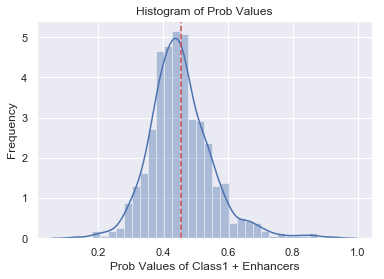

In [26]:
#using intersect--class 1
class1_peak=[]
p_val_class1 = []


class1 = pybedtools.BedTool('class_1_genes.bed')
prob_file = pybedtools.BedTool('chr1_enhancer_prob.bed')
class1_with_prob = class1.intersect(prob_file)
i=0 

df = pd.read_table(class1_with_prob.fn, names=['chrom', 'start', 'stop', 'symbol', 'strand'])
start_class1 = pd.to_numeric(df['start'])

for val in start['start']:
    if (val in start_class1.values):
        #get the location at which the value is 
        location = start[start['start'] == val].index.values
        #print(location[0])
        #get the value of avg prob at the index
        val = avg_prob[location[0]]
        p_val_class1.append(val)
        class1_peak.append(1)
    else:
        class1_peak.append(0)

val = len(class1_peak) - 1
class1_peak_plot = ((pd.DataFrame(class1_peak)).iloc[0:val, :]).values.tolist()       
class1_peak_heatmap = ((pd.DataFrame(class1_peak)).iloc[0:val, :])
# print(len(p_val_kas))
# print(len(avg_prob))
# print(len(start))
# print(len(kasPeak_plot))
sns.distplot(p_val_class1)
mean = stats.mean(p_val_class1)
plt.axvline(mean, color='r', linestyle='--')
plt.xlabel("Prob Values of Class1 + Enhancers")
plt.ylabel("Frequency")
plt.title("Histogram of Prob Values")
plt.show()   


In [15]:
#to use intersect, i need a bed file-- need to convert csv to bed for class 2
class2 = pd.read_csv('class_2_genes.csv', names=['chr', 'start', 'end', 'symbol', 'strand'])
start_vals=[]
end=[]

res = []
i=0
for st in class2['start']:
    seq_name = class2['chr'][i]
    seq_start = class2['start'][i]
    seq_end = class2['end'][i]
    i+=1
    if seq_start not in (pd.DataFrame(start_vals).values: #returns true if the element is not present
        start_vals.append([seq_start])
        res.append([seq_name, seq_start, seq_end])
    
df_res = pd.DataFrame(res)

df_res.to_csv('class_2_genes.bed', sep = '\t', index = False, header = False)


SyntaxError: invalid syntax (<ipython-input-15-7036c9d67a79>, line 13)

/Users/Jumana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  # This is added back by InteractiveShellApp.init_path()


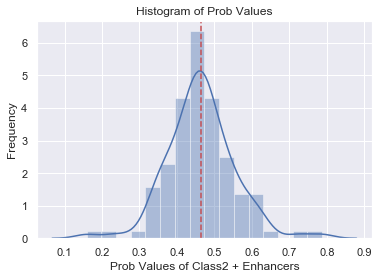

In [27]:
#using intersect--class 2
class2_peak=[]
p_val_class2 = []


class2 = pybedtools.BedTool('class_2_genes.bed')
prob_file = pybedtools.BedTool('chr1_enhancer_prob.bed')
class2_with_prob = class2.intersect(prob_file)
i=0 

df = pd.read_table(class2_with_prob.fn, names=['chrom', 'start', 'stop', 'symbol', 'strand'])
start_class2 = pd.to_numeric(df['start'])

for val in start['start']:
    if (val in start_class2.values):
        #get the location at which the value is 
        location = start[start['start'] == val].index.values
        #print(location[0])
        #get the value of avg prob at the index
        val = avg_prob[location[0]]
        p_val_class2.append(val)
        class2_peak.append(1)
    else:
        class2_peak.append(0)

val = len(class2_peak) - 1
class2_peak_plot = ((pd.DataFrame(class2_peak)).iloc[0:val, :]).values.tolist()       
class2_peak_heatmap = ((pd.DataFrame(class2_peak)).iloc[0:val, :])
# print(len(p_val_kas))
# print(len(avg_prob))
# print(len(start))
# print(len(kasPeak_plot))
sns.distplot(p_val_class2)
mean = stats.mean(p_val_class2)
plt.axvline(mean, color='r', linestyle='--')
plt.xlabel("Prob Values of Class2 + Enhancers")
plt.ylabel("Frequency")
plt.title("Histogram of Prob Values")
plt.show()   


In [17]:
#to use intersect, i need a bed file-- need to convert csv to bed for class 3
class3 = pd.read_csv('class_3_genes.csv', names=['chr', 'start', 'end', 'symbol', 'strand'])
start_vals=[]
end=[]

res = []
i=0
for st in class3['start']:
    seq_name = class3['chr'][i]
    seq_start = class3['start'][i]
    seq_end = class3['end'][i]
    i+=1
    if seq_start not in (pd.DataFrame(start_vals)).values: #returns true if the element is not present
        start_vals.append([seq_start])
        res.append([seq_name, seq_start, seq_end])
    
df_res = pd.DataFrame(res)

df_res.to_csv('class_3_genes.bed', sep = '\t', index = False, header = False)


/Users/Jumana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  del sys.path[0]


/Users/Jumana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  del sys.path[0]


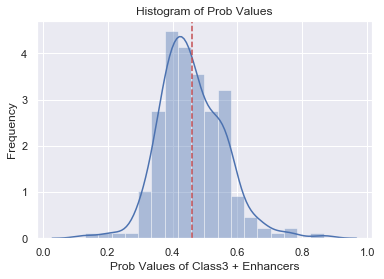

In [28]:
#using intersect--class 3
class3_peak=[]
p_val_class3 = []
len_val_class3 = []
A_val_class3 = []


class3 = pybedtools.BedTool('class_3_genes.bed')
prob_file = pybedtools.BedTool('chr1_enhancer_prob.bed')
class3_with_prob = class3.intersect(prob_file)
i=0 

df = pd.read_table(class3_with_prob.fn, names=['chrom', 'start', 'stop', 'symbol', 'strand'])
start_class3 = pd.to_numeric(df['start'])

for val in start['start']:
    if (val in start_class3.values):
        #get the location at which the value is 
        location = start[start['start'] == val].index.values
        #print(location[0])
        #get the value of avg prob at the index
        val = avg_prob[location[0]]
        specific_len = length[location[0]]
        p_val_class3.append(val)
        len_val_class3.append(specific_len)
        specific_avg_total_A = avg_total_A[location[0]]
        A_val_class3.append(specific_avg_total_A)
        class3_peak.append(1)
    else:
        class3_peak.append(0)

val = len(class3_peak) - 1
class3_peak_plot = ((pd.DataFrame(class3_peak)).iloc[0:val, :]).values.tolist()       
class3_peak_heatmap = ((pd.DataFrame(class3_peak)).iloc[0:val, :])
# print(len(p_val_kas))
# print(len(avg_prob))
# print(len(start))
# print(len(kasPeak_plot))
sns.distplot(p_val_class3)
mean = stats.mean(p_val_class3)
plt.axvline(mean, color='r', linestyle='--')
plt.xlabel("Prob Values of Class3 + Enhancers")
plt.ylabel("Frequency")
plt.title("Histogram of Prob Values")
plt.show()   


In [19]:
#to use intersect, i need a bed file-- need to convert csv to bed for class 4
class1 = pd.read_csv('class_4_genes.csv', names=['chr', 'start', 'end', 'symbol', 'strand'])
start_vals=[]
end=[]

res = []
i=0
for st in class1['start']:
    seq_name = class1['chr'][i]
    seq_start = class1['start'][i]
    seq_end = class1['end'][i]
    i+=1
    if seq_start not in (pd.DataFrame(start_vals)).values: #returns true if the element is not present
        start_vals.append([seq_start])
        res.append([seq_name, seq_start, seq_end])
    
df_res = pd.DataFrame(res)

df_res.to_csv('class_4_genes.bed', sep = '\t', index = False, header = False)

/Users/Jumana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  del sys.path[0]


/Users/Jumana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  # This is added back by InteractiveShellApp.init_path()


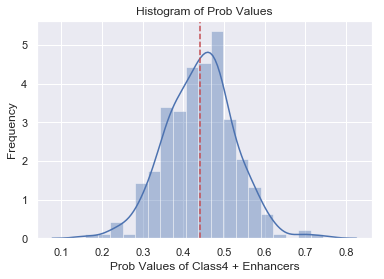

In [29]:
#using intersect--class 4
class4_peak=[]
p_val_class4 = []


class4 = pybedtools.BedTool('class_4_genes.bed')
prob_file = pybedtools.BedTool('chr1_enhancer_prob.bed')
class4_with_prob = class4.intersect(prob_file)
i=0 

df = pd.read_table(class4_with_prob.fn, names=['chrom', 'start', 'stop', 'symbol', 'strand'])
start_class4 = pd.to_numeric(df['start'])

for val in start['start']:
    if (val in start_class4.values):
        #get the location at which the value is 
        location = start[start['start'] == val].index.values
        #print(location[0])
        #get the value of avg prob at the index
        val = avg_prob[location[0]]
        #store vals in a pd
        p_val_class4.append(val)
        class4_peak.append(1)
    else:
        class4_peak.append(0)

val = len(class4_peak) - 1
class4_peak_plot = ((pd.DataFrame(class4_peak)).iloc[0:val, :]).values.tolist()       
class4_peak_heatmap = ((pd.DataFrame(class4_peak)).iloc[0:val, :])
# print(len(p_val_kas))
# print(len(avg_prob))
# print(len(start))
# print(len(kasPeak_plot))
mean = stats.mean(p_val_class4)

sns.distplot(p_val_class4)
plt.axvline(mean, color='r', linestyle='--')
plt.xlabel("Prob Values of Class4 + Enhancers")
plt.ylabel("Frequency")
plt.title("Histogram of Prob Values")
plt.show()   


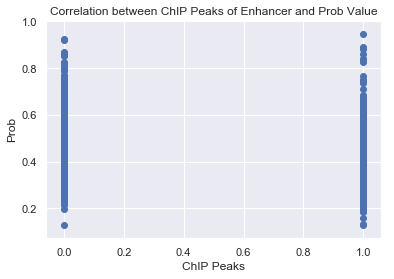

In [18]:
##plotting correlation between chip peaks and prob-- without intersect   
chipPeak = []
bedFile = pd.read_csv('mESC_H3K4me3.bed', sep='\t', comment='t', names=['chrom', 'chromStart', 'chromEnd'])
#print(bedFile.head())
#want only chr1 from the bedFile
chr1Bed = bedFile.loc[bedFile['chrom'] == "chr1"]

#
start = []
end = []
index = 0

start = []
end = []
for seqId in result['seq id']:
    seq_start = (seqId.split('chr1:'))[1].split('-')[0]
    seq_end = seqId.split('-', 1)[1]
    #if you haven't ever seen the start or end
    if seq_start not in start:
        start.append(seq_start)
        if seq_end not in end:
            end.append(seq_end)
            
            start_result = binary_search(pd.to_numeric(pd.to_numeric(chr1Bed['chromStart'])), 0, len(pd.to_numeric(chr1Bed['chromStart']))-1, int(seq_start), 70)
            stop_result = binary_search(pd.to_numeric(pd.to_numeric(chr1Bed['chromEnd'])), 0, len(pd.to_numeric(chr1Bed['chromEnd']))-1, int(seq_end), 70)
            if (start_result != -1 and stop_result != 1):
                chipPeak.append(1)
                
            else:
                chipPeak.append(0)
                
val = len(chipPeak) - 1

chipPeak_plot = ((pd.DataFrame(chipPeak)).iloc[0:val, :]).values.tolist()

chipPeak_heatmap = ((pd.DataFrame(chipPeak)).iloc[0:val, :])
plt.scatter(x=chipPeak_plot, y=avg_prob)
plt.xlabel("ChIP Peaks")
plt.ylabel("Prob")
plt.title("Correlation between ChIP Peaks of Enhancer and Prob Value")
plt.show()



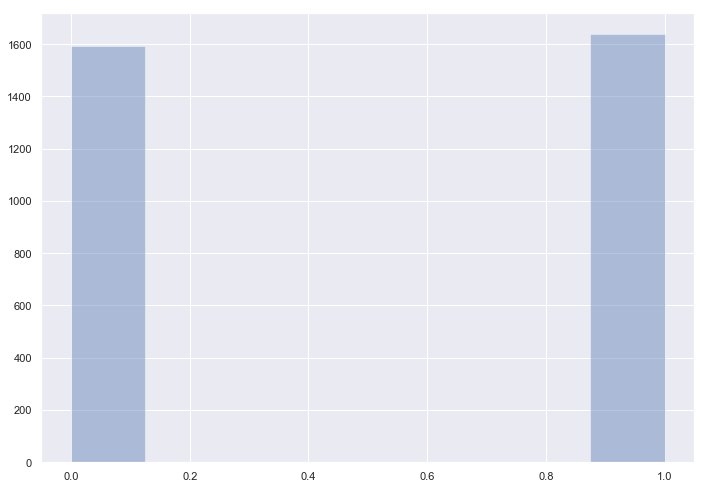

In [61]:
#chip histogram to verify window values that are reasonable
sns.distplot(chipPeak_plot, kde=False)

# Statistical Tests

In [45]:
#mann whitney: null hypothesies is that the two groups are equal
alpha = 0.05


print("kas and class1 values")
stat, p = mannwhitneyu(p_val_kas, p_val_class1)
n1 = len(p_val_kas)
n2 = len(p_val_class1)
print(stat)
print(p)
if (p > alpha):
    print("Using alpha = 0.05, same distribution, fail to reject H0")
else:
    print("Different distributions, reject H0")
if (stat < (n1*n2)/2):
    print("U value is smaller than n1*n2/2, H0 is most likely false, so different distributions")
else:
    print("U value larger than n1*n2/2")

print()
print("kas and class2 values")
stat, p = mannwhitneyu(p_val_kas, p_val_class2)
n1 = len(p_val_kas)
n2 = len(p_val_class2)
print(stat)
print(p)
if (p > alpha):
    print("Using alpha = 0.05, same distribution, fail to reject H0")
else:
    print("Different distributions, reject H0")
if (stat < (n1*n2)/2):
    print("U value is smaller than n1*n2/2, H0 is most likely false, so different distributions")
else:
    print("U value larger than n1*n2/2")

print()
print("kas and class3 values")
stat, p = mannwhitneyu(p_val_kas, p_val_class3)
n1 = len(p_val_kas)
n2 = len(p_val_class3)
print(stat)
print(p)
if (p > alpha):
    print("Using alpha = 0.05, same distribution, fail to reject H0")
else:
    print("Different distributions, reject H0")
if (stat < (n1*n2)/2):
    print("U value is smaller than n1*n2/2, H0 is most likely false, so different distributions")
else:
    print("U value larger than n1*n2/2")


print()
print("kas and class4 values")
stat, p = mannwhitneyu(p_val_kas, p_val_class4)
print(stat)
print(p)
n1 = len(p_val_kas)
n2 = len(p_val_class4)
if (p > alpha):
    print("Using alpha = 0.05, same distribution, fail to reject H0")
else:
    print("Different distributions, reject H0")
if (stat < (n1*n2)/2):
    print("U value is smaller than n1*n2/2, H0 is most likely false, so different distributions")
else:
    print("U value larger than n1*n2/2")

print()
print("class1 and class2 values")
stat, p = mannwhitneyu(p_val_class1, p_val_class2)
print(stat)
print(p)
n1 = len(p_val_class1)
n2 = len(p_val_class2)
if (p > alpha):
    print("Using alpha = 0.05, same distribution, fail to reject H0")
else:
    print("Different distributions, reject H0")
if (stat < (n1*n2)/2):
    print("U value is smaller than n1*n2/2, H0 is most likely false, so different distributions")
else:
    print("U value larger than n1*n2/2")

print()
print("class1 and class3 values")
stat, p = mannwhitneyu(p_val_class1, p_val_class3)
print(stat)
print(p)
n1 = len(p_val_class3)
n2 = len(p_val_class1)
if (p > alpha):
    print("Using alpha = 0.05, same distribution, fail to reject H0")
else:
    print("Different distributions, reject H0")
if (stat < (n1*n2)/2):
    print("U value is smaller than n1*n2/2, H0 is most likely false, so different distributions")
else:
    print("U value larger than n1*n2/2")

print()
print("class1 and class4 values")
stat, p = mannwhitneyu(p_val_class1, p_val_class4)
print(stat)
print(p)
n1 = len(p_val_class4)
n2 = len(p_val_class1)
if (p > alpha):
    print("Using alpha = 0.05, same distribution, fail to reject H0")
else:
    print("Different distributions, reject H0")
if (stat < (n1*n2)/2):
    print("U value is smaller than n1*n2/2, H0 is most likely false, so different distributions")
else:
    print("U value larger than n1*n2/2")



kas and class1 values
57416.5
5.715612538214828e-07
Different distributions, reject H0
U value is smaller than n1*n2/2, H0 is most likely false, so different distributions

kas and class2 values
8599.5
8.07252986637767e-07
Different distributions, reject H0
U value is smaller than n1*n2/2, H0 is most likely false, so different distributions

kas and class3 values
18307.5
7.245370161561868e-06
Different distributions, reject H0
U value is smaller than n1*n2/2, H0 is most likely false, so different distributions

kas and class4 values
29427.0
0.0002914322041692342
Different distributions, reject H0
U value is smaller than n1*n2/2, H0 is most likely false, so different distributions

class1 and class2 values
32949.5
0.05707987321146828
Using alpha = 0.05, same distribution, fail to reject H0
U value is smaller than n1*n2/2, H0 is most likely false, so different distributions

class1 and class3 values
67084.5
0.25948396080838887
Using alpha = 0.05, same distribution, fail to reject H0
U va

In [52]:
print(anderson_ksamp([p_val_kas, p_val_class1]))
print()
print(anderson_ksamp([p_val_kas, p_val_class2]))
print()
print(anderson_ksamp([p_val_kas, p_val_class3]))
print()
print(anderson_ksamp([p_val_kas, p_val_class4]))

Anderson_ksampResult(statistic=14.972125952470899, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

Anderson_ksampResult(statistic=14.479944214959186, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

Anderson_ksampResult(statistic=12.774913921905156, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)

Anderson_ksampResult(statistic=7.193261240794212, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)


/Users/Jumana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: p-value floored: true value smaller than 0.001
  """Entry point for launching an IPython kernel.
/Users/Jumana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: p-value floored: true value smaller than 0.001
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Jumana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: p-value floored: true value smaller than 0.001
  """
/Users/Jumana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: p-value floored: true value smaller than 0.001
  import sys


In [ ]:
#plot distribution of random seed prob values

# Histogram

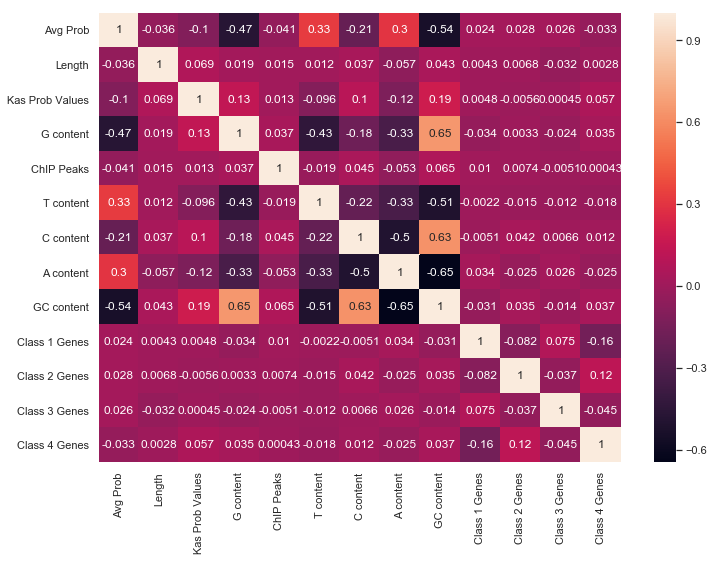

In [64]:
#heatmap

df = pd.DataFrame()
df.insert(0, "Avg Prob", avg_prob)
df.insert(1, "Length", avg_total_length)
df.insert(2, "Kas Prob Values", kasPeak_heatmap)
df.insert(3, "G content", avg_total_G)
df.insert(4, "ChIP Peaks", chipPeak_heatmap)
df.insert(5, "T content", avg_total_T)
df.insert(6, "C content", avg_total_C)
df.insert(7, "A content", avg_total_A)
df.insert(8, "GC content", avg_total_GC)
df.insert(9, "Class 1 Genes", class1_peak_heatmap)
df.insert(10, "Class 2 Genes", class2_peak_heatmap)
df.insert(11, "Class 3 Genes", class3_peak_heatmap)
df.insert(12, "Class 4 Genes", class4_peak_heatmap)
sns.heatmap(df.corr(), annot = True)


In [63]:
df_2 = pd.DataFrame()
df_2.insert(0, "KAS+ Prob Values", p_val_kas)
df_2.insert(1, "KAS+ Length Values", len_val_kas)
df_2.insert(2, "KAS+ GC Values", gc_val_kas)

# Multivariate Plots

Text(0.5, 1.0, 'Kas Peaks, Length, and Prob Value Correlation')

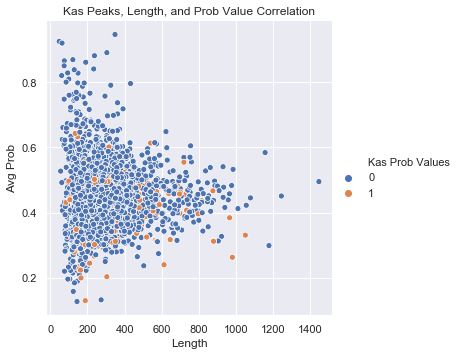

In [35]:
#kas peaks, length, and prob
sns.relplot(x="Length", y="Avg Prob", hue="Kas Prob Values", data=df)
plt.title("Kas Peaks, Length, and Prob Value Correlation")

In [36]:
px.scatter(df, x="Length", y="Avg Prob", color="Kas Prob Values", trendline="ols")

Text(0.5, 1.0, 'Kas Peaks, G content, and Prob Value Correlation')

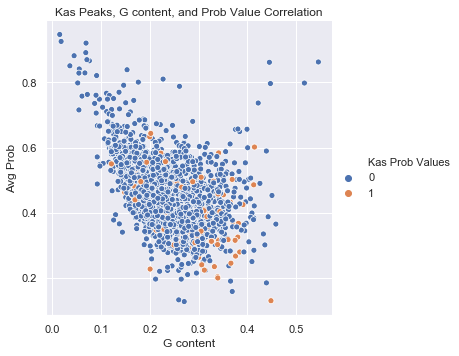

In [37]:
#kas peaks, G content, and prob
sns.relplot(x="G content", y="Avg Prob", hue="Kas Prob Values", data=df)
plt.title("Kas Peaks, G content, and Prob Value Correlation")

In [100]:
px.scatter(df, x= "GC content", y="Avg Prob", title = "Probability of Secondary Structure and GC Content", trendline = "ols") #can change trendline to lowess

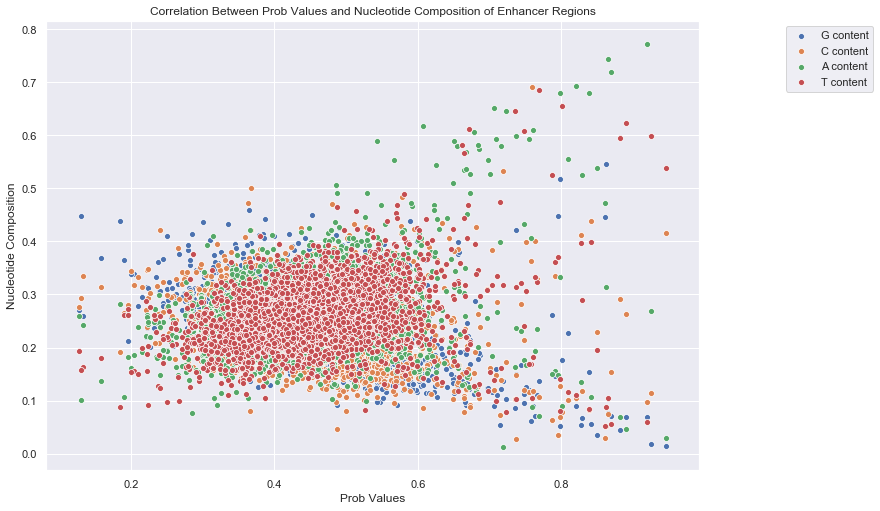

In [91]:
sns.scatterplot(avg_prob, avg_total_G, label = "G content")
sns.scatterplot(avg_prob, avg_total_C, label = "C content")
sns.scatterplot(avg_prob, avg_total_A, label = "A content")
sns.scatterplot(avg_prob, avg_total_T, label = "T content")
plt.xlabel("Prob Values")
plt.ylabel("Nucleotide Composition")
plt.title("Correlation Between Prob Values and Nucleotide Composition of Enhancer Regions")
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1), shadow=False, ncol=1)

In [ ]:
#chip peaks, length, and prob
sns.relplot(x="Length", y="Avg Prob", hue="ChIP Peaks", data=df)
plt.title("ChIP Peaks, Length, and Prob Value Correlation")

In [ ]:
px.scatter(df, x="Length", y="Avg Prob", color="ChIP Peaks", trendline = "ols")

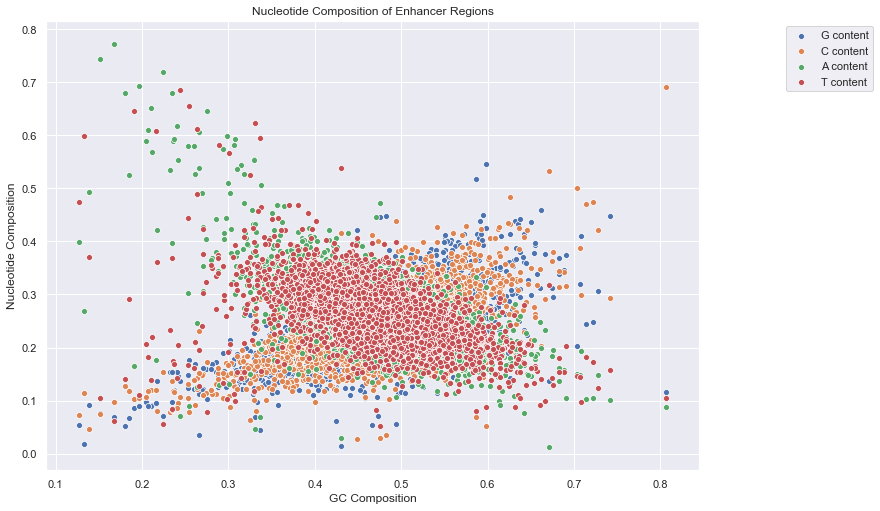

In [39]:
#correlation between nucleotide composition and G-C content
sns.scatterplot(avg_total_GC, avg_total_G, label = "G content")
sns.scatterplot(avg_total_GC, avg_total_C, label = "C content")
sns.scatterplot(avg_total_GC, avg_total_A, label = "A content")
sns.scatterplot(avg_total_GC, avg_total_T, label = "T content")
plt.xlabel("GC Composition")
plt.ylabel("Nucleotide Composition")
plt.title("Nucleotide Composition of Enhancer Regions")
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1), shadow=False, ncol=1)

In [40]:
px.scatter(df, x = "Length", y = "GC content", color = "Avg Prob")
#most of the values are concentrated in one region, but higher probs generally in smaller legnth + low gc and higher prob vise versa

In [41]:
px.scatter(df, x = "Class 1 Genes", y = "GC content", color = "Avg Prob")

In [42]:
px.scatter(df, x = "Class 2 Genes", y = "GC content", color = "Avg Prob")

In [43]:
px.scatter(df, x = "Class 3 Genes", y = "GC content", color = "Avg Prob")

In [44]:
px.scatter(df, x = "Class 4 Genes", y = "GC content", color = "Avg Prob")

In [84]:
px.scatter(df_2, x = "KAS+ GC Values", y = "KAS+ Prob Values", color = "KAS+ Length Values", trendline = "ols")

In [86]:
px.scatter(df_2, x = "KAS+ GC Values", y = "KAS+ Prob Values", title = "KAS-seq+ Prob Values and GC Content", trendline = "ols")